In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm, skew, kurtosis
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

[*********************100%%**********************]  1 of 1 completed
Historical VaR exceedances:  111
Normal VaR exceedances:  101
Historical VaR exceedance proportion:  0.04413518886679921
Normal VaR exceedance proportion:  0.040159045725646124


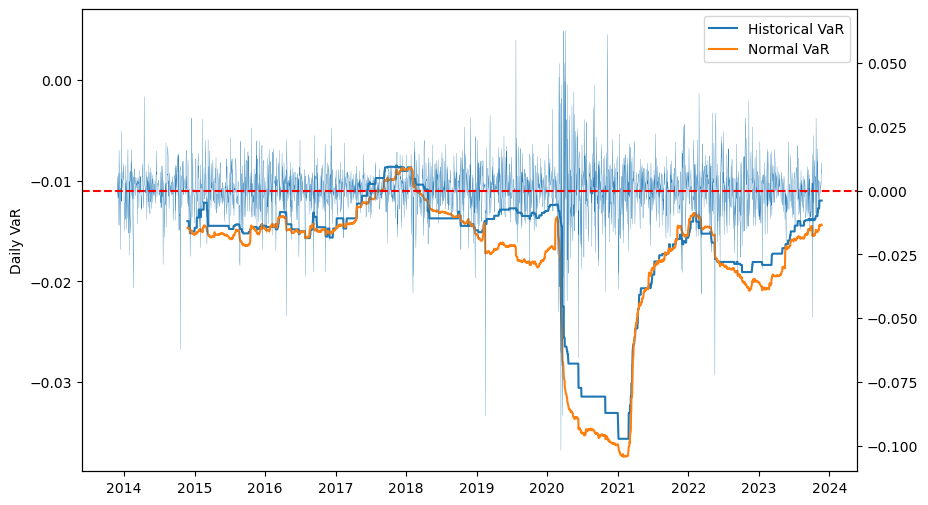

In [36]:
df = yf.download('KO', period='10Y')[['Adj Close']]

df['log_returns'] = np.log(df['Adj Close']).diff()
df.dropna(inplace=True)

# calculate rolling HistrOcal VaR and Normal linear VaR
df['VaR_hist'] = df['log_returns'].rolling(252).quantile(0.05)
df['VaR_norm'] = norm.ppf(0.05, df['log_returns'].rolling(252).mean(), df['log_returns'].rolling(250).std())

# plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax2.plot(df['log_returns'], label='Daily Log Returns', linewidth=0.2)
ax1.plot(df['VaR_hist'], label='Historical VaR')
ax1.plot(df['VaR_norm'], label='Normal VaR')
ax2.axhline(0, color='red', linestyle='--', label='Mean')
ax1.set_ylabel('Daily VaR')
ax1.legend()

ax1.set_ylim(top=abs(ax1.get_ylim()[1]))

# backtest
df['exceed_hist'] = df['log_returns'] < df['VaR_hist']
df['exceed_norm'] = df['log_returns'] < df['VaR_norm']

# calculate the number of exceedances
print('Historical VaR exceedances: ', df['exceed_hist'].sum())
print('Normal VaR exceedances: ', df['exceed_norm'].sum())

# calculate the proportion of exceedances
print('Historical VaR exceedance proportion: ', df['exceed_hist'].mean())
print('Normal VaR exceedance proportion: ', df['exceed_norm'].mean())
